In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
def mean_16_84(name):
    length = name[0].size
    mean = np.zeros(length)
    percentile16 = np.zeros(length)
    percentile84 = np.zeros(length)

    for i in range(length):
        mean[i] = np.mean(name[:,i])
        percentile16[i] = np.percentile(name[:,i],16)
        percentile84[i] = np.percentile(name[:,i],84)

    return mean, percentile16, percentile84

In [3]:
stat = np.load('082817_Reid_wo_ptcl_corrected.npz')

(array([   1.,   17.,   65.,  190.,  248.,  249.,  158.,   49.,   19.,    4.]),
 array([ 88137. ,  88261.9,  88386.8,  88511.7,  88636.6,  88761.5,
         88886.4,  89011.3,  89136.2,  89261.1,  89386. ]),
 <a list of 10 Patch objects>)

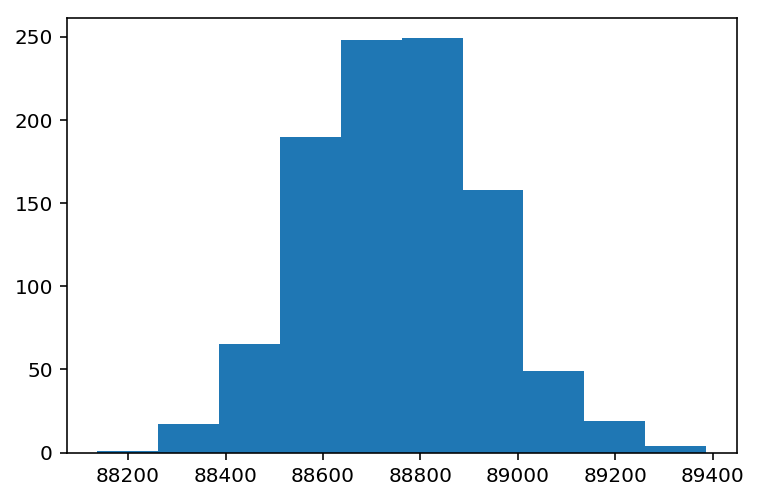

In [4]:
plt.hist(stat['ngals'])

In [5]:
stat.keys()

['ngals', 'wprp', 'rp', 'deltasigma', 'param']

In [6]:
wp = stat['wprp']
ds= stat['deltasigma']

In [7]:
print stat['param'][0]

[  0.73   14.09    0.32   13.27   13.004]


In [8]:
rp = stat['rp'][0]
print rp

[  0.05282343   0.08333484   0.13146998   0.20740853   0.32721003
   0.51621023   0.81437908   1.28477361   2.02687332   3.1976182
   5.0445985    7.95841545  12.5552859 ]


In [9]:
r_wp0 = np.logspace(-1, np.log10(500)-1, 20)
r_wp = (r_wp0[:-1] + r_wp0[1:])/2.

In [10]:
r_wp

array([  0.11934594,   0.16552314,   0.22956716,   0.31839103,
         0.44158252,   0.61243912,   0.84940336,   1.17805354,
         1.63386467,   2.26603772,   3.14281045,   4.35882307,
         6.04533391,   8.3843876 ,  11.62846526,  16.12773774,
        22.36786359,  31.02241179,  43.02556789])

In [11]:
wp_mean = mean_16_84(wp)[0]
wp_16 = mean_16_84(wp)[1]
wp_84 = mean_16_84(wp)[2]
ds_mean = mean_16_84(ds)[0]
ds_16 = mean_16_84(ds)[1]
ds_84 = mean_16_84(ds)[2]

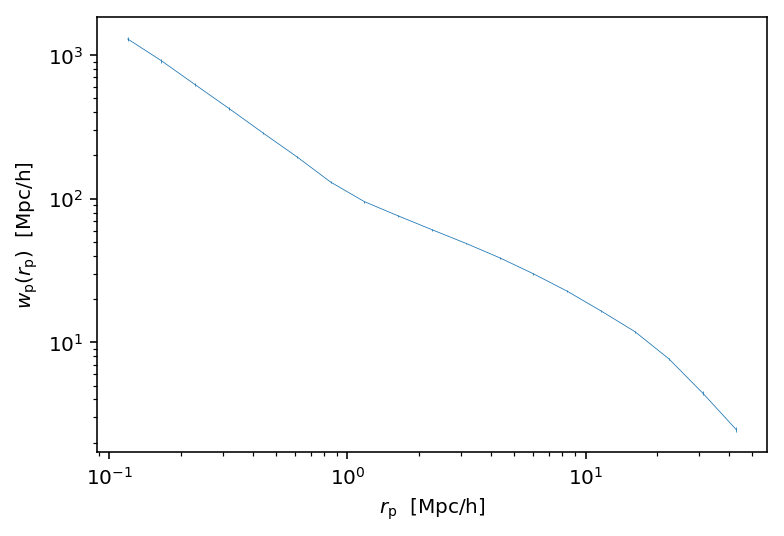

In [12]:
plt.errorbar(r_wp, wp_mean,\
             yerr=(wp_mean-wp_16,wp_84-wp_mean), fmt='-', lw=0.4)
plt.loglog()
plt.xlabel(r'$r_{\rm p} $  $\rm{[Mpc / h]}$')
plt.ylabel(r'$w_{\rm p}(r_{\rm p})$  $\rm{[Mpc / h]}$')

In [13]:
def two_sigma(name):
    length = name[0].size
    percentile2p5 = np.zeros(length)
    percentile97p5 = np.zeros(length)

    for i in range(length):
        percentile2p5[i] = np.percentile(name[:,i],2.5)
        percentile97p5[i] = np.percentile(name[:,i],97.5)

    return percentile2p5, percentile97p5

In [14]:
print two_sigma(wp)[0]
print two_sigma(wp)[1]

[ 1221.90570659   862.92295519   591.04819707   405.85081439   275.60589926
   188.77206629   126.13277805    92.24427852    73.57882026    59.13166739
    47.68508474    37.86191636    29.27693268    22.10302551    16.07687558
    11.4723545      7.3713244      4.21039111     2.26248836]
[ 1370.48219694   958.68641303   650.12173714   442.87729201   298.23377459
   202.96336666   135.1525703     98.54623573    78.18601321    62.3137937
    50.01651289    39.63214069    30.67003275    23.22285555    16.95846586
    12.19935994     7.97226953     4.68075214     2.65297913]


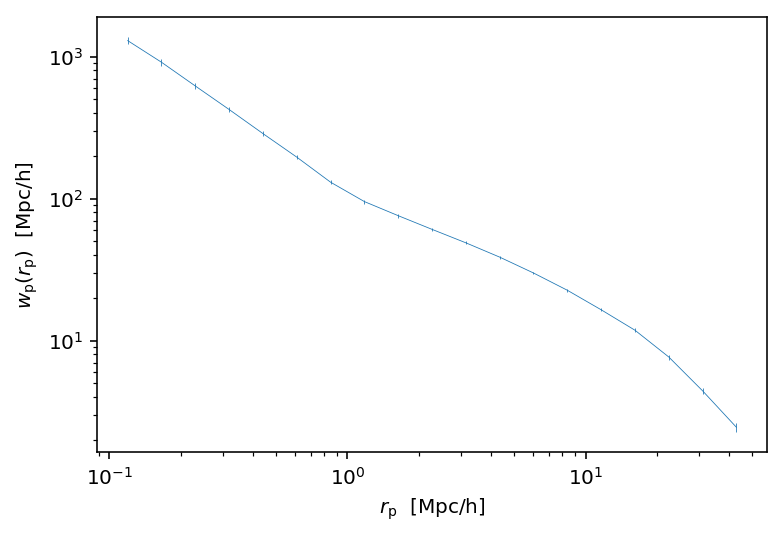

In [15]:
plt.errorbar(r_wp, wp_mean,\
             yerr=(wp_mean-two_sigma(wp)[0],two_sigma(wp)[1]-wp_mean), fmt='-', lw=0.4)
plt.loglog()
plt.xlabel(r'$r_{\rm p} $  $\rm{[Mpc / h]}$')
plt.ylabel(r'$w_{\rm p}(r_{\rm p})$  $\rm{[Mpc / h]}$')

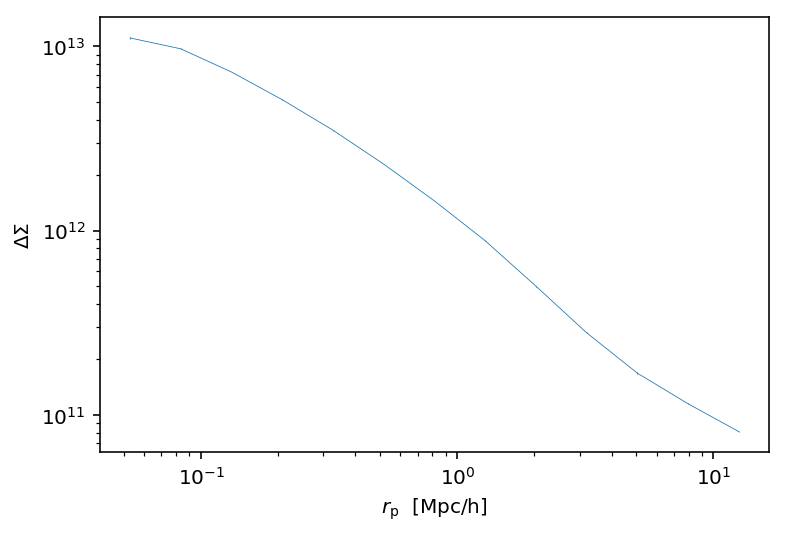

In [16]:
plt.errorbar(rp, ds_mean,\
             yerr=(ds_mean-ds_16,ds_84-ds_mean), fmt='-', lw=0.4)
plt.loglog()
plt.xlabel(r'$r_{\rm p} $  $\rm{[Mpc / h]}$')
plt.ylabel(r'$\Delta\Sigma$')